In [1]:
import cv2
import numpy as np
import face_recognition
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

2023-05-23 12:56:52.555836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 12:56:52.698731: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/limsim/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-23 12:56:52.698758: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-23 12:56:53.341078: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

In [3]:
path= 'image'
images= []
classname = []
ilist= os.listdir(path)
print(ilist)

['dad.jpg', 'bhanja.jpg', 'sumit.jpg', 'raju_don.jpg', 'Amit.jpg', 'praphool.jpg', 'mukesh.jpg']


In [4]:
for cl in ilist:
    curimage=cv2.imread(f'{path}/{cl}')
    images.append(curimage)
    classname.append(os.path.splitext(cl)[0])
print(classname)


['dad', 'bhanja', 'sumit', 'raju_don', 'Amit', 'praphool', 'mukesh']


In [5]:
def findencoding(images):
    encoded=[]
    for img in images:
        img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        encode= face_recognition.face_encodings(img)[0]
        encoded.append(encode)
    return encoded    

In [6]:
from datetime import datetime
def markattendance(name):
    with open('att.txt','r+') as f:
        mydatalist = f.readlines()
        namelist =[]
        for line in mydatalist:
            entry = line.split(',')
            namelist.append(entry[0])
        if name not in namelist:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')
        #print(mydatalist)
        

    

In [7]:
'''markattendance('sumit')'''

"markattendance('sumit')"

In [8]:
encodedlist= findencoding(images)
print('encodedlist completed')

encodedlist completed


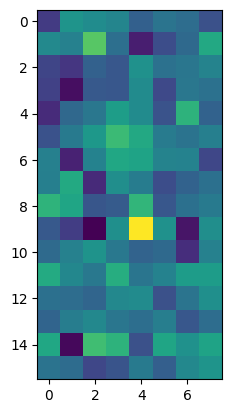

In [9]:
plt.imshow(np.reshape(encodedlist[0],(16,8)))

In [10]:
with open('test1.npy', 'wb') as f:
    np.save(f,encodedlist)

In [11]:
cap= cv2.VideoCapture(0)

while True:
    sucess,img = cap.read()
    imgs = cv2.resize(img,(0,0),None,0.25,0.25)
    imgs = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
    
    faceloc = face_recognition.face_locations(imgs)
    encode= face_recognition.face_encodings(imgs, faceloc)
    
    for encode,faceloc in zip(encode, faceloc):
        matches = face_recognition.compare_faces(encodedlist,encode)
        facedis = face_recognition.face_distance(encodedlist,encode)
        #print(facedis)
        matchindex = np.argmin(facedis)
        
        if matches[matchindex]:
            name = classname[matchindex].upper()
            #print(name)
            y1,x2,y2,x1 = faceloc
            y1,x2,y2,x1 = y1*4,x2*4,y2*4,x1*4
            cv2.rectangle(imgs,(x1,y1),(x2,y2),(0,255,255),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,255),cv2.FILLED)
            cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            
            markattendance(name)
            
            
            
    cv2.imshow('webcam',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()    
    